In [1]:
#https://pythonprogramming.net/convolutional-neural-network-kats-vs-dogs-machine-learning-tutorial/
    
#Imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#from sklearn import make_blobs, make_circles
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 850M (CNMeM is disabled, cuDNN not available)


In [2]:
import cv2
import os
from random import shuffle
from tqdm import tqdm

TRAIN_DIR = '/home/nick/Documents/data/cats_vs_dogs/train/'
TEST_DIR = '/home/nick/Documents/data/cats_vs_dogs/test/'
IMG_SIZE = 50
LR = 0.001

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [3]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return [1,0]
    elif word_label == 'dog': return [0,1]

In [20]:
os.listdir(TRAIN_DIR)
print(len(tqdm(os.listdir(TRAIN_DIR))))

for img in tqdm(os.listdir(TRAIN_DIR)):
    #label = label_img(img)
    if len(img.split('.')) == 4:print("skip")
    else: print("Ok!")

  4%|▍         | 2000/50000 [00:00<00:02, 18198.48it/s]

50000
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
skip
skip
skip
Ok!
skip
skip
skip
skip
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
skip
skip
skip
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
skip
skip
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
skip
skip
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
skip
O

  9%|▉         | 4495/50000 [00:00<00:03, 13077.23it/s]

skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
skip
skip
skip
skip
skip
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
skip
skip
skip
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
O

 16%|█▌        | 7991/50000 [00:00<00:02, 14737.26it/s]

skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
skip
skip
skip
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
skip
skip
skip
skip
skip
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok

 24%|██▎       | 11787/50000 [00:00<00:02, 16191.69it/s]


Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
skip


 30%|███       | 15219/50000 [00:00<00:02, 16487.75it/s]


Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
skip
skip
Ok!
skip
Ok!
skip
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
skip
skip
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
s

 37%|███▋      | 18576/50000 [00:01<00:01, 16082.96it/s]

skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
skip
skip
skip
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
skip
skip
skip
skip
skip
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
O

 45%|████▍     | 22473/50000 [00:01<00:01, 16833.72it/s]

skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
skip
skip
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
skip
skip

 52%|█████▏    | 26206/50000 [00:01<00:01, 14515.81it/s]


skip
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
skip
skip
Ok!
skip
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
O

 60%|█████▉    | 29964/50000 [00:01<00:01, 15736.44it/s]

skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
skip
skip
skip
skip
skip
Ok

 68%|██████▊   | 33959/50000 [00:02<00:00, 16829.83it/s]


skip
skip
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
skip
skip
skip
skip
Ok!
skip
skip
skip
Ok!
skip
skip
skip
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!

 76%|███████▌  | 37924/50000 [00:02<00:00, 17803.80it/s]

Ok!
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
skip
skip
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
skip
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
skip
skip
skip
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
skip
skip
skip
skip
skip
skip
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
skip
skip

 83%|████████▎ | 41516/50000 [00:02<00:00, 16888.94it/s]

Ok!
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
skip
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
skip
skip
skip
skip
skip
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
skip


 90%|█████████ | 45148/50000 [00:02<00:00, 14254.12it/s]

Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
skip
skip
skip
Ok!
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
s

 97%|█████████▋| 48441/50000 [00:03<00:00, 14717.14it/s]


skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
skip
skip
skip
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
Ok!
Ok!
skip
skip
skip
skip
skip
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
s

100%|██████████| 50000/50000 [00:03<00:00, 15987.17it/s]


Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
skip
skip
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
skip
skip
Ok!
skip
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
skip
skip
skip
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
Ok!
skip
Ok!
Ok!
skip
skip
skip
Ok!
skip
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
skip
skip
Ok!
Ok!
skip
skip
Ok!
Ok!
Ok!
Ok!
skip
skip
skip
skip
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
skip
Ok!
skip
skip
Ok!
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
skip
Ok!
Ok!
s

In [23]:

def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        if len(img.split('.')) == 3:
            label = label_img(img)
            path = os.path.join(TRAIN_DIR, img)
            img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
            training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data
        

In [24]:
train_data = create_train_data()

#for num, data in enumerate(train_data[:3]):
#    print(num)
#    print(data[1])
#    print(data[0])


100%|██████████| 50000/50000 [00:27<00:00, 1846.73it/s]


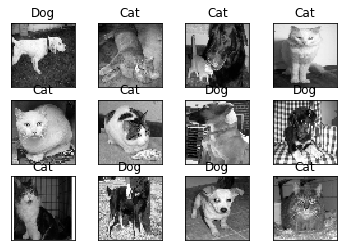

In [25]:
fig = plt.figure()

for num, data in enumerate(train_data[:12]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    
    #model_out = model.predict([data])[0]
    
    if img_num[0] == 0: str_label = 'Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

In [26]:
#train = train_data[:-500]
#test = train_data[-500:]

train = train_data

#array[:,0] and array[:,1] seems NOT to work here :(
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = np.array([i[1] for i in train])

print(X.shape)
#print(len(X))
#print(X[1])

print(Y.shape)
#print(len(Y))
#print(Y[1])

#test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
#test_y = [i[1] for i in test]

(25000, 50, 50, 1)
(25000, 2)


In [66]:
#Model
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))  
model.add(MaxPooling2D())

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))  
model.add(MaxPooling2D())

# Flatten CNN layers output
model.add(Flatten())

# Fully connected layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(2, activation='softmax'))

# Optimizer
model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 50, 50, 32)        832       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 64)        51264     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 128)       204928    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 6, 6, 64)          204864    
__________

In [67]:
# Fit model
history = model.fit(X, Y, validation_split=0.1, epochs=15, batch_size=32, verbose=2)

Train on 22500 samples, validate on 2500 samples
Epoch 1/15
64s - loss: 0.6976 - acc: 0.5506 - val_loss: 0.7163 - val_acc: 0.5112
Epoch 2/15
64s - loss: 0.6406 - acc: 0.6370 - val_loss: 0.9188 - val_acc: 0.5116
Epoch 3/15
64s - loss: 0.5925 - acc: 0.6907 - val_loss: 0.6758 - val_acc: 0.5892
Epoch 4/15
64s - loss: 0.5411 - acc: 0.7312 - val_loss: 0.7944 - val_acc: 0.5660
Epoch 5/15
64s - loss: 0.4933 - acc: 0.7642 - val_loss: 0.7201 - val_acc: 0.6500
Epoch 6/15
64s - loss: 0.4545 - acc: 0.7858 - val_loss: 0.4918 - val_acc: 0.7704
Epoch 7/15
64s - loss: 0.4123 - acc: 0.8113 - val_loss: 0.4772 - val_acc: 0.7708
Epoch 8/15
64s - loss: 0.3746 - acc: 0.8325 - val_loss: 0.7129 - val_acc: 0.6532
Epoch 9/15
64s - loss: 0.3358 - acc: 0.8541 - val_loss: 0.6034 - val_acc: 0.6944
Epoch 10/15
64s - loss: 0.3074 - acc: 0.8658 - val_loss: 0.5080 - val_acc: 0.7732
Epoch 11/15
65s - loss: 0.2668 - acc: 0.8875 - val_loss: 0.6826 - val_acc: 0.6896
Epoch 12/15
67s - loss: 0.2324 - acc: 0.9047 - val_loss: 0

In [57]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        if len(img.split('.')) == 2:
            path = os.path.join(TEST_DIR,img)
            img_num = img.split('.')[0]
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            testing_data.append([np.array(img), img_num])

    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

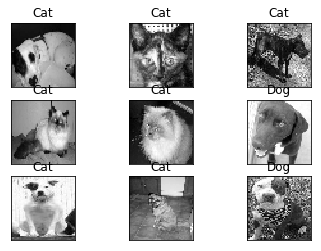

In [69]:
#https://www.youtube.com/watch?v=27FPv1VHSsQ

#test_data = process_test_data()
test_data = np.load('test_data.npy')

fig = plt.figure()

for num, data in enumerate(test_data[1130:1139]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,3,num+1)
    orig = img_data
    data = img_data.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    
    model_out = model.predict([data])[0]
    #model_out = 1
    
    if np.argmax(model_out) == 1: str_label = 'Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()


In [ ]:
#Inputs
# 28 x 28 image
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

In [ ]:
#Outputs
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(y_train[1,:])

In [ ]:
#Model
model = Sequential()

model.add()